# Cálculo Numérico - 2021.2 - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390
## Questões discutidas com: Beatriz Almeira Ramos, Carlos Bravo, Diego Matos, Matheus Barroso, Ramon Oliveira

# Exercício 2.1)
Para inicializar, devemos identificar primeiro os termos que serão utilizados para descrever o Método de Newton para o problema em questão. Como buscamos uma aproximação de $\sqrt[3]{43}$, devemos buscar uma função tal que

$$x = \sqrt[3]{43}$$
$$x^{3} = 43$$
$$x^{3} - 43 = 0$$
$$f(x) = x^{3} - 43$$

Com isto, aplicando no método de Newton como conhecemos, isto é

$$x_{n+1} = x_{n} - \dfrac{f(x)}{f'(x)}$$

teremos para o problema em questão que

$$x_{n+1} = x_{n} - \dfrac{x_{1}^{3} - 43}{3x_{1}^{2}}$$

Para implementar este algoritmos, utilizamos o seguinte código.

In [1]:
# Exercício 2.1. Encontrar aproximação para raiz cúbica de 43.
# Para isto, usaremos que f(x) = x^3-43 e f'(x) = 3x^2
function raiz_cubica_43(iteracoes, chute) # Número de iterações e chute inicial
    for i=1:iteracoes
        chute = chute - (chute^3-43)/(3*chute^2) # Chute - f(chute)/f'(chute)
    end
    return chute # Aproximação do resultado. Quanto mais iterações, maior a precisão.
end

raiz_cubica_43 (generic function with 1 method)

Utilizando os $f(x)$ e $f'(x)$ achados em questão, podemos determinar um chute inicial para encontrar o valor em questão e o número de iterações que queremos realizar, sendo a nossa precisão maior quanto mais iterações fizermos. Um exemplo abaixo utiliza 5 iterações e um chute inicial 4.

In [4]:
raiz_cubica_43(5, 4)

3.5033980603867243

In [ ]:
Com isto, podemos obter o erro aproximado abaixo.

In [7]:
erro = ((43)^(1/3)) - raiz_cubica_43(5, 4)

-4.440892098500626e-16

Por fim, podemos perceber um chute inicial problemático apenas analisando o Método. Na expressão, temos que um dos termos realizando uma divisão, que é o termo $$\dfrac{f(x)}{f'(x)}$$

Com isto, um potencial chute problemático é um chute $x$ tal que $0 < f'(x) < 1$, pois isso fará com que o resultado desta expressão usando chute inicial seja alto. Com isto, é necessário mais iterações para obter uma boa precisão. No exemplo abaixo, utilizando o chute inicial $0.001$, precisamos de pelo menos 41 iterações para obtermos corretamente as primeiras casas decimas ($3.50$).

In [34]:
raiz_cubica_43(41, 0.001)

3.5036113722614584

Por fim, um potencial chute problemático também é o próprio $0$, pois resultaria em uma divisão por $0$.

# Exercício 2.2)

Para encontrar um exemplo de função $f(x)$ que satisfaça a condição dada, vamos interpretar o problema geométricamente, tendo em mente que, quaisquer que seja o polinômio $f(x)$, ele será da forma 

$$f(x) = ax^2 + bx + c$$

ou seja, devemos ter uma parábola no gráfico da função. Sabemos também que, pelo método de Newton, os termos $x_{n}$ irão alternar entre $1$ e $2$, isto é, aplicando o método utilizando $x_{0} = 1$ encontraremos $2$, utilizando o termo $x_{1} = 2$ encontraremos $1$ e subsequentemente. Plotando esses dois pontos, temos que

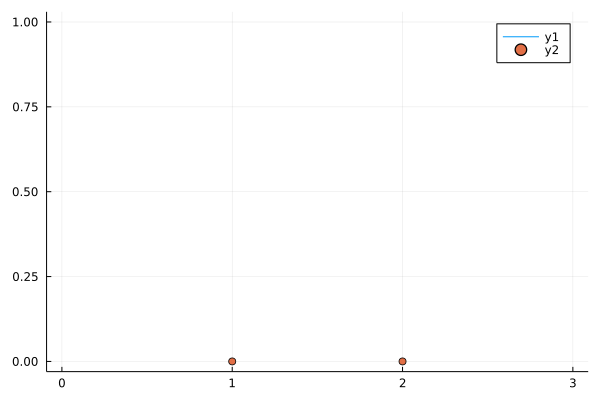

In [67]:
using Plots
f(x) = NaN
rts = [1, 2]
plot(f, 0, 3)
scatter!(rts, [0, 0])

Sabemos também que a função $f(x)$ que queremos encontrar, quando derivada no ponto em questão e "caminhar" sobre a reta formada pela inclinação da derivada, deve convergir em $1$ ou $2$, dependendo do ponto em questão. Para nos auxiliar a achar essa função então, vamos traçar uma retas simétricas sobre os pontos $1$ e $2$, que coincidem no ponto $\dfrac{1}{2}$.

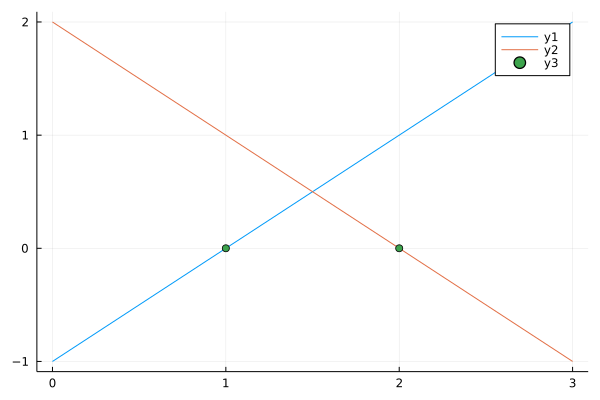

In [70]:
using Plots
f(x) = x-1
g(x) = -x+2
rts = [1, 2]
plot([f, g], 0, 3)
scatter!(rts, [0, 0])

Com isto, podemos montar a parábola acima destas funções. Como queremos encontrar um local onde os pontos $x_{0}$ e $x_{1}$ possuam a mesma inclinação, podemos posicionar a função neste ponto central encontrado. Com isto, temos que a "base" da função será $f(x) = (x-1.5)^2$

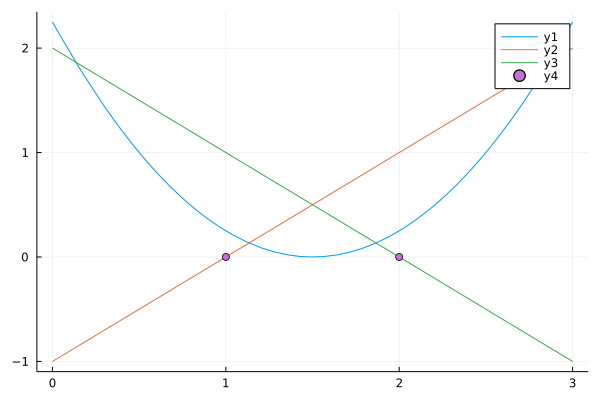

In [71]:
using Plots
f(x) = (x-1.5)^2
g(x) = x-1
h(x) = -x+2
rts = [1, 2]
plot([f, g, h], 0, 3)
scatter!(rts, [0, 0])

Após isto, precisamos apenas subir o termo $c$ da função até que onde as retas se intersectam, pois, desta forma, os pontos $f(1)$ e $f(2)$ terão a mesma inclinação desejada. Para isto, podemos subir o termo até $0.75$, onde os pontos terão está inclinação, nos fornecendo a função $f(x) = (x-1.5)²+0.75 = (x²-3x+3)$

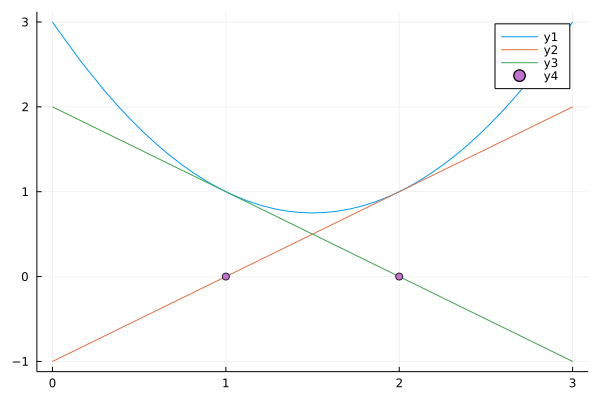

In [73]:
using Plots
f(x) = x^2-3x+3
g(x) = x-1
h(x) = -x+2
rts = [1, 2]
plot([f, g, h], 0, 3)
scatter!(rts, [0, 0])

Como prova de conceito, podemos utilizar a função no Método de Newton.

$$x_{1} = x_{0} - \dfrac{x_{0}^2-3x_{0}+3}{2x_{0}-3} = 1 - (-1) = 2$$
$$x_{2} = x_{1} - \dfrac{x_{1}^2-3x_{1}+3}{2x_{1}-3} = 1 - (+1) = 1$$
$$x_{3} = x_{2} - \dfrac{x_{2}^2-3x_{2}+3}{2x_{2}-3} = 1 - (-1) = 2$$
$$x_{4} = x_{3} - \dfrac{x_{3}^2-3x_{3}+3}{2x_{3}-3} = 1 - (+1) = 1$$
$$\vdots$$

Com isto, temos que a função atende ao exemplo requisito, pois é um polinômio de grau 2 e alterna entre os valores 1,2,1,2...


# Exercício 4.1)

Para o problema em questão, vamos utilizar inicialmente o Teorema de Taylor de Ordem 1 para rescrever o problema, isto é

$$f(x) - (f(a) + f'(a)(x-a)) \leq M\dfrac{(x-a)^2}{2}$$

Para isolarmos o termo $f'(a)$ a fim de chegarmos nessa aproximação, podemos dividir a expressão por $(x-a)$

$$\dfrac{f(x)}{(x-a)} - \dfrac{f(a)}{(x-a)} - \dfrac{f'(a)(x-a)}{(x-a)} \leq \dfrac{M\dfrac{(x-a)^2}{2}}{(x-a)}$$

$$\dfrac{f(x)}{(x-a)} - \dfrac{f(a)}{(x-a)} - f'(a) \leq M\dfrac{(x-a)}{2}$$

Juntando os termos em comum, temos que

$$\dfrac{f(x) - f(a)}{(x-a)} - f'(a) \leq M\dfrac{(x-a)}{2}$$

Com isto, temos que a aproximação da função descrita, $\dfrac{f(x) - f(a)}{(x-a)}$ realmente vai ser $f'(a)$, com teto de erro de $M\dfrac{(x-a)}{2}$







# Exercício 4.2)

Para aproximarmos a função, vamos utilizar Taylor. Como $sen(x)$ tem limite em $1$, temos que

$$f(x) = sen(x)$$
$$M = 1$$

Como conhecemos também o $sen(0)$, podemos utilizar $a = 0$ tal que $f(a) = sin(0) = 0$

Com isto, começaremos com Taylor de ordem 0, tal que

$$f(x) - f(a) \leq M(x-a)$$
$$sen(0.01) - sen(0) \leq 1(0.01 - a)$$
$$sen(0.01) \leq 0.01$$

Como ainda não obtemos a precisão que queremos, utilizaremos Taylor de grau 1. Como $f(x) = sen(x)$, sabemos que $f'(x) = cos(x)$.

$$f(x) - f(a) + f'(a)(x-a) \leq \dfrac{M(x-a)^{2}}{2}$$
$$sen(0.01) - sen(0) + cos(0)(0.01-0) \leq \dfrac{1(0.01-0)^{2}}{2}$$
$$sen(0.01) + 0.01 \leq 0.00005$$

Como ainda não obtemos a precisão que queremos, utilizaremos Taylor de grau 2. Como $f'(x) = cos(x)$, sabemos que $f''(x) = -sen(x)$.

$$f(x) - f(a) + f'(a)(x-a) + \dfrac{f''(a)(x-a)^2}{2} \leq \dfrac{M(x-a)^{3}}{6}$$
$$sen(0.01) + 0.01 + \dfrac{-sen(0) * (0.01-0)^2}{2} \leq \dfrac{1(0.01-0)^{3}}{6}$$
$$sen(0.01) + 0.01 + 0 \leq \frac{0.000001}{6}$$
$$sen(0.01) + 0.01 \leq 1.66667 \cdot 10^{-7}$$

Como $0.0000001$ é na ordem de $10^{-7}$, que é menor que $10^{-6}$, temos que chegamos na aproximação requisitada com erro máximo menor que $10^{-6}$. Isto é, $sen(0.01) \approx 0.01$, com erro máximo de $10^{-7}$.




# Exercício 4.3)

Podemos utilizar a aproximação sinx $\approx x$ pois, conforme aumentamos a precisão da cálculo, isto é, utilizamos mais termos da série de Taylor, podemos observar que o valor do erro tende a convergir para 0, isto é, vai diminuindo cada vez, nos devolvendo como aproximação o próprio termo $x$. Este fator pode ser observado no exercício 4.2, onde a ordem do erro é da casa de $1 \cdot 10^{n}$ e vai diminuindo cada vez que aplicamos mais a série. Podemos calcular mais erros da série para observarmos isto melhor.

$$T_{0} = 1(0.01 - 0) = 0.01$$
$$T_{1} = \dfrac{1(0.01 - 0)^{2}}{2!} = 0.00005$$
$$T_{2} = \dfrac{1(0.01 - 0)^{3}}{3!} = 1.66667 \cdot 10^{-7}$$
$$T_{3} = \dfrac{1(0.01 - 0)^{4}}{4!} = 4.16667\cdot 10^{-10}$$
$$T_{4} = \dfrac{1(0.01 - 0)^{5}}{5!} = 8.33333 \cdot 10^{-13}$$
$$T_{5} = \dfrac{1(0.01 - 0)^{6}}{6!} = 1.38889 \cdot 10^{-15}$$
$$\vdots$$


# Exercício 4.4)

Fazendo $f(x) = ln(x)$ com $x=1.5$ e utilizando o polinômio de Taylor de terceira ordem com a=1, teremos que calcular a seguinte expressão

$$f(x) - f(a) + f'(a)(x-a) + \dfrac{f''(a)(x-a)^2}{2!} + \dfrac{f^{(3)}(a)(x-a)^3}{3!}$$

Substituindo os termos, temos que

$$ln(1.5) - ln(1) + f'(1)(1.5-1) + \dfrac{f''(1)(1.5-1)^2}{2} + \dfrac{f^{(3)}(1)(1.5-1)^3}{6}$$

Como $f'(x) = \dfrac{1}{x}$, $f''(x) = \dfrac{-1}{x^2}$ e $f^{(3)}(x) = \dfrac{2}{x^3}$, temos que

$$ln(1.5) - ln(1) + (\dfrac{1}{1})(0.5) + \dfrac{\dfrac{-1}{1^2}(0.5)^2}{2} + \dfrac{\dfrac{2}{1^3}(0.5)^3}{6}$$

$$= ln(1.5) - 0 + (1)(0.5) + \dfrac{-0.25}{2} + \dfrac{0.25}{6}(*)$$

Por fim, podemos passar os termos para frações e realizar as contas descritas, para chegar na aproximação desejada

$$ln(1.5) + \dfrac{1}{2} - \dfrac{1}{8} + \dfrac{1}{24}$$ 

$$ln(1.5) + \dfrac{5}{12}$$

Como $ln(1.5) = 0.40546...$, nossa aproximação teve 2 dígitos de precisão, já que $\dfrac{5}{12} = 0.41666...$.

Para o erro do truncamento, podemos calcular apenas o valor do lado direito da desiguldade para vermos se percebemos algum padrão. Vamos utilizar diferentes ordens de Taylor para isto, onde $M$ sempre será $f^(n+1)$ em $n=1$.

$$T_{1} = M\dfrac{(1.5-1)^{1}}{1!} = (-\dfrac{1}{1^2})(\dfrac{0.5}{1}) = -0.5$$
$$T_{2} = M\dfrac{(1.5-1)^{2}}{2!} = (\dfrac{2}{1^3})(\dfrac{0.25}{2}) = 0.25...$$
$$T_{3} = M\dfrac{(1.5-1)^{3}}{3!} = (-\dfrac{6}{1^4})(\dfrac{0.125}{6}) = -0.125...$$
$$T_{4} = M\dfrac{(1.5-1)^{4}}{4!} = (\dfrac{24}{1^5})(\dfrac{0.0625}{24}) = 0.0625$$
$$T_{5} = M\dfrac{(1.5-1)^{5}}{5!} = (-\dfrac{120}{1^6})(\dfrac{0.03125}{120}) = -0.03125$$
$$T_{6} = M\dfrac{(1.5-1)^{6}}{6!} = (\dfrac{720}{1^7})(\dfrac{0.015625}{720}) = 0.015625$$
$$T_{7} = M\dfrac{(1.5-1)^{7}}{7!} = (-\dfrac{5040}{1^8})(\dfrac{0.0078125}{5040}) = -0.00520$$
$$\vdots$$

Com isto, podemos perceber que, conforme a série vai obtendo uma maior precisão, o erro de truncamento tende a diminuir o expoente da precisão, andando sempre uma casa decimal aproximadamente a cada três termos da série. Com isto, podemos perceber também que houve a formação de um padrão para o cálculo do erro, composto pela multiplicação de duas frações que alternam os valores. Está fórmula pode ser determinada por

$$ E =  {n!} \cdot \dfrac{\dfrac{1}{2^n}}{n!} = \dfrac{1}{2^{n}}$$

Podemos então rodar o trecho de código a seguir para verificar quantas vezes este cálculo é executado, afim de determinar quantos termos é necessário da série para termos um erro pelo menos menor que $10^{-8}$


In [54]:
# Função fatorial para nos auxiliar a resolver o problema
function fatorial(x)
   if x <= 1
        return 1
    else
        return x * (fatorial(x-1))
    end
end

erro = 0
i = 1
while true # Repetirá até encontrar o termo da condição
    erro = (1/(2^i)) # Cálculo do erro utilizando o padrão encontrado
    if erro < 10.0^(-8) # Se o erro for menor que 10^-8, encontramos o termo esperado
        break
    end
    i += 1
end
println(i)

27


# Exercício 4.5)

Neste exercício, utilizaremos o polinômio de Taylor para fazer uma função que realize a aproximação de $ln(x)$. Para isto, como no exercício 4.4, utilizaremos o valor conhecido $f(a)$ tal que $a = 1$, isto é, $f(1) = ln(1) = 0$

Para nos auxiliar também, durante a confecção do exercício 4.4), pode ser percebido um padrão (*) para a aproximação da série em $x=1.5$ e $a=1$, sendo este padrão

$$T_{N} = \sum_{n=1}^{\infty} \dfrac{((-1)^{(n+1)}) \cdot (n-1)! \cdot (0.5)n}{(n)!}$$

Com isto, vamos reproduzir este resultado em nosso código.


In [47]:
# Função fatorial para nos auxiliar a resolver o problema
function fatorial(x)
   if x <= 1
        return 1
    else
        return x * (fatorial(x-1))
    end
end

# Função para encontrar uma aproximação de ln(x) para x = 1.5 e a = 1
# Para isto, o usuário deve passar o valor de x, sendo este o erro máximo tal que maxErro = 10^(-x)
function log_natural(maxErro)
    aproximacao = 0
    x = 1.5 # Valor de ln(x) que queremos achar
    a = 1 # Taylor centrado em 1
    i = 1
    while true # Repetirá até encontrar um erro menor que o erro máximo permitido
        aproximacao += ( ((-1)^(i+1)*fatorial(i-1)) * (0.5)^i) / fatorial(i) # Cálculo utilizando o padrão observado na questão.
        erro = (1/(2^i)) # Cálculo do erro utilizando o padrão encontrado na questão 4.4
        if erro < 10.0^(maxErro*-1) # Se for menor que o erro esperado, encerra o algoritmo e retorna o número de termos utilizados na aproximação
            println("Foram usados ",i, " termos")
            return aproximacao
        end
        i += 1
    end
end

log_natural (generic function with 1 method)

Como prova de conceito, vamos obter primeiro a mesma aproximação encontrada no exercício anterior.

In [52]:
log_natural(8)

Foram usados 27 termos


0.4054640888814804

# Exercício 4.6)


Expandindo a série de Taylor de $sen(x)$ pra segunda ordem com $a = 0$, temos que

$$f(x) - f(a) + f'(a)(x-a) + \dfrac{f''(a)(x-a)^2}{2} \leq \dfrac{M(x-a)^{3}}{6}$$
$$sen(x) - sen(0) + cos(0)(x-0) + \dfrac{-sen(0) * (x-0)^2}{2} \leq \dfrac{\pm1(x-0)^{3}}{6}$$
$$sen(x) + x \leq \pm\frac{x^3}{6}$$

Dividindo ambos os termos da desigualdade por $x^3$

$$\dfrac{sen(x)}{x^3} + \dfrac{x}{x^3} \leq \pm\frac{1}{6}$$
$$\dfrac{sen(x) + x}{x^3} \leq \pm\frac{1}{6}$$

Como já sabemos que $sen(x) \approx x$ para valores próximos de $x$, pode-se inferir que o valor do limite, encontrado na expressão, será igual ao do erro, isto é, $\pm\frac{1}{6}$.
Como a função não está definida nos reais, temos que

$$\lim_{x \to 0} \dfrac{sen(x) - x}{x^3} = -\frac{1}{6}$$


# Exercício 4.7)

Para este exercício, criaremos uma função que plota os $N$ termos da função $cos(x)$ para $x=0$ e $a=0$. Após isto, como pedido no exercício proposto, plotaremos os $5$ primeiros termos da série.

$$T_{0} = cos(0) = 1$$
$$T_{1} = \dfrac{-sin(0)(x-0)^{1}}{1!} = -\dfrac{sin(0) \cdot x}{1!} = 0$$
$$T_{2} = \dfrac{-cos(0)(x-0)^{2}}{2!} = -\dfrac{cos(0)\cdot x^2}{2} = - \dfrac{x^2}{2}$$
$$T_{3} = \dfrac{sin(0)(x-0)^{3}}{3!}  = \dfrac{sin(0)\cdot x^3}{6} = 0$$
$$T_{4} = \dfrac{cos(0)(x-0)^{4}}{4!}  = \dfrac{cos(0)\cdot x^4}{24} = \dfrac{x^4}{24}$$
$$T_{5} = \dfrac{-sin(0)(x-0)^{5}}{5!} = -\dfrac{sin(0) \cdot x^5}{120} = 0$$
$$T_{6} = \dfrac{-cos(0)(x-0)^{6}}{6!} = -\dfrac{cos(0) \cdot x^6}{720} =-\dfrac{x^6}{720}$$
$$\vdots$$

Como podemos perceber, foi encontrado um padrão para a aproximação da série em $0$. Podemos representá-lo na seguinte forma.

$$T_{N} = \sum_{n=0}^{\infty} \dfrac{((-1)^{(n)})}{(2n)!}x^{2n}$$

In [283]:
using Plots

# Função fatorial para nos auxiliar a resolver o problema
function fatorial(x)
   if x <= 1
        return 1
    else
        return x * (fatorial(x-1))
    end
end

# Esta função plota os primeiros 5 termos da série de Taylor de cos(x) com a = 0
function cosseno()
    c(x) = cos(x) # Função cos(x)
    f(x) = cos(0) # Primeiro termo da série de Taylor
    g(x) = cos(0) - (x^2)/(2) # Segundo termo da série de Taylor
    h(x) = cos(0) - (x^2)/(2) + (x^4)/(fatorial(4)) # Terceiro termo da série de Taylor
    j(x) = cos(0) - (x^2)/(2) + (x^4)/(fatorial(4)) - (x^6)/(fatorial(6)) # Quarto termo da série de Taylor
    k(x) = cos(0) - (x^2)/(2) + (x^4)/(fatorial(4)) - (x^6)/(fatorial(6)) + (x^8)/(fatorial(8)) # Quinto termo da série de Taylor
    plot(
        [c,f,g,h,j,k],  
        xaxis = ("x", (-6,6)), 
        yaxis = ("y", (-6,4)),  
        label = ["função cos()" "Taylor - 1 termos" "Taylor - 2 termos" "Taylor - 3 termos" "Taylor - 4 termos" "Taylor - 5 termos"])
end

cosseno (generic function with 2 methods)

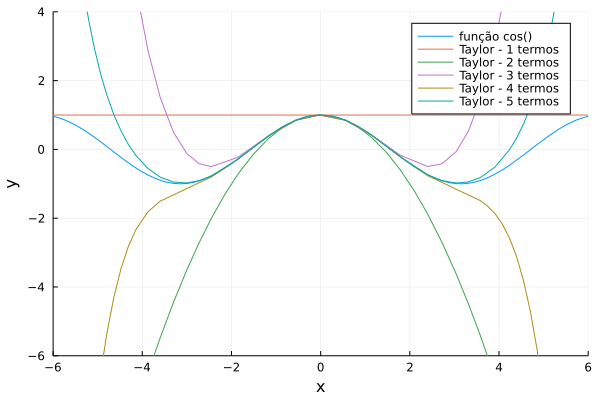

In [284]:
cosseno()